<a href="https://colab.research.google.com/github/AlxScottt/undergrad_ml_assignments/blob/main/02_assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2: $k$ Nearest Neighbor

### Do any four.

### I chose 1, 3, 5, 6

Sources Used:
Used ChatGPT version 5 to help me code, accsed at https://chatgpt.com/

In [1]:
#get the data
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 69 (delta 11), reused 6 (delta 6), pack-reused 41 (from 2)
Receiving objects: 100% (69/69), 13.84 MiB | 12.43 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [3]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

**Q1.** Please answer the following questions.
1. **What is the difference between regression and classification?**
Regression focuses on predicting contions numerical values, while classifcation predicts discreate catorgires or labels.

2. **What is a confusion table/matrix? What does it help us understand about a model's performance? **
From my understanding, its bascially a table that compares the perfomance of a model with the actual true labes (so model accuracy)

3. **What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?**
Accuray is how many answers a model got right out of total number of predctions. Its not always the end all be all, cause say for example a model is good at guessing a small section of the subset at 99% accuracy, but gets the other subset wrong 99% of the time, it seems good (but only in one case)

4. **What does the root mean squared error quantify about a particular model?**
It quantifies the average magnitude of the erros between a models gussed value and the actual observed value. (basically how close it was to the true answer)

5. **What are overfitting and underfitting?**
Overfitting is when you give a model wayy too many varibles, so  it does great on the training data, but horrible on new data. Underfitting is when you give to little varibles, and the vise versa of the previous sit. Thats why you wanna be in the middle.

6. **Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?**
You split the data into training and testing, so you can see how your model does when presented with new data. By choosign a k value, you can see a unbaised guess of how the model does when making gueses.


7. **With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.**
Using class labels can be good if you need a defiantive answer, but if model is uncertain, it could lead to really bad decsions. (like if a model says you have cancer but its only 51% sure).
Probablity distrubtion is good at showing the probablty of an event givin a certain certianty of a model, although it can be finniky and require lots of fine tuning. You have to make sure your choosing the right varibles. Also like mentioned in class, soetimes people will manipulte the data they have to get the RESULT they want. So make sure you arent doing that when doing it, make your results re-producable basicaaly!

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [4]:
import pandas as pd #my import statments
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [5]:
#1
df = pd.read_csv("./data/USA_cars_datasets.csv") #actauolly get the data into the dataframe

# Keep only needed columns
df = df[['price', 'year', 'mileage']]

# Drop NA values
df = df.dropna()

print(df.head())
print(df.shape)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [6]:
#2
scaler = MinMaxScaler()

X = df[['year', 'mileage']]
y = df['price']

X_scaled = scaler.fit_transform(X)

In [7]:
#3
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

k = 3, MSE = 148065935.51955554


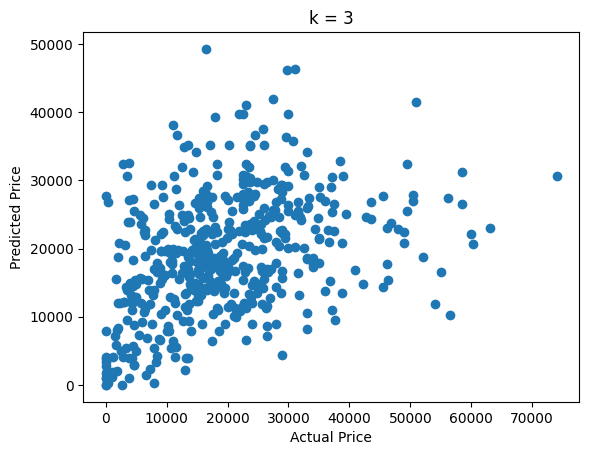

k = 10, MSE = 117399126.10604002


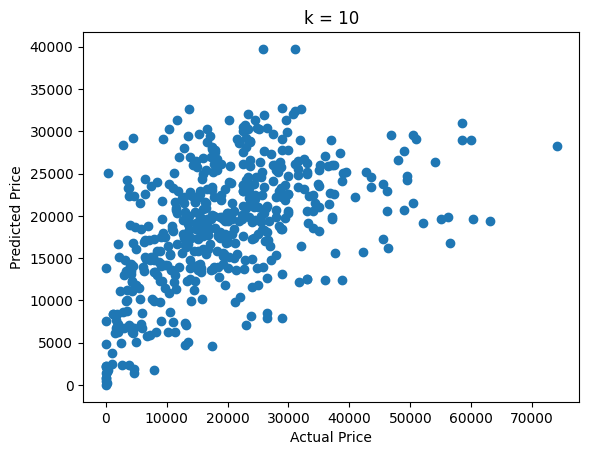

k = 25, MSE = 112576160.82390079


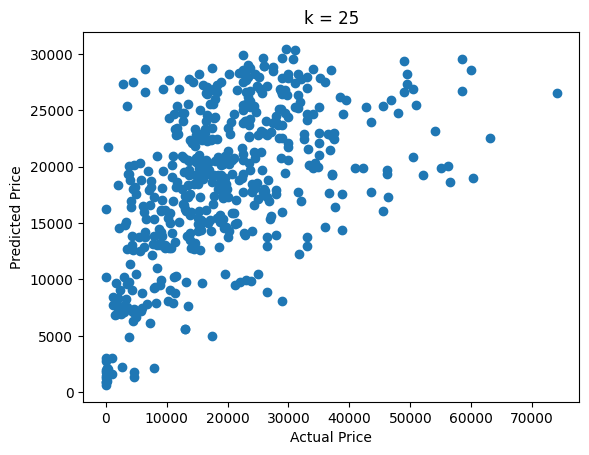

k = 50, MSE = 110202549.3014296


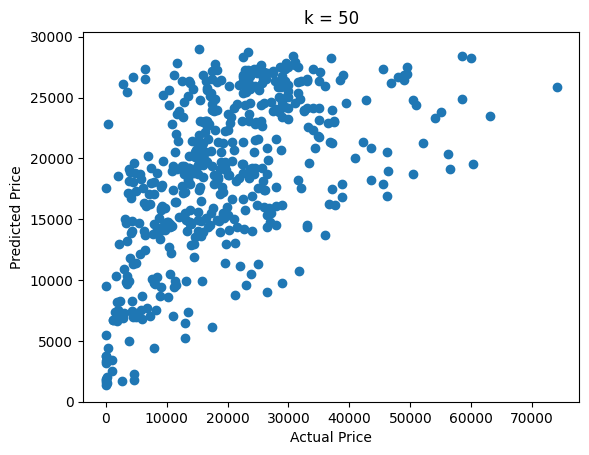

k = 100, MSE = 112253702.9700672


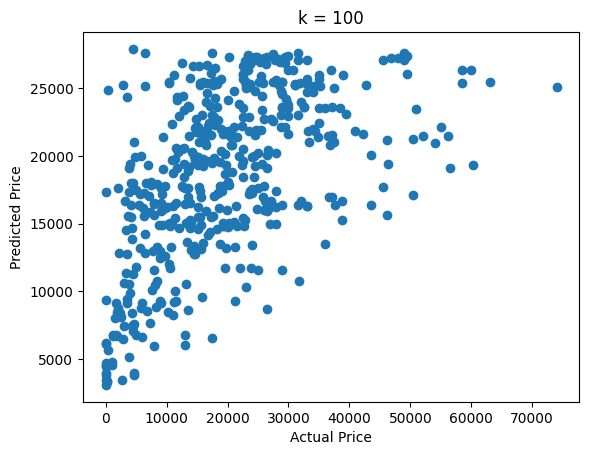

k = 300, MSE = 114496092.28682345


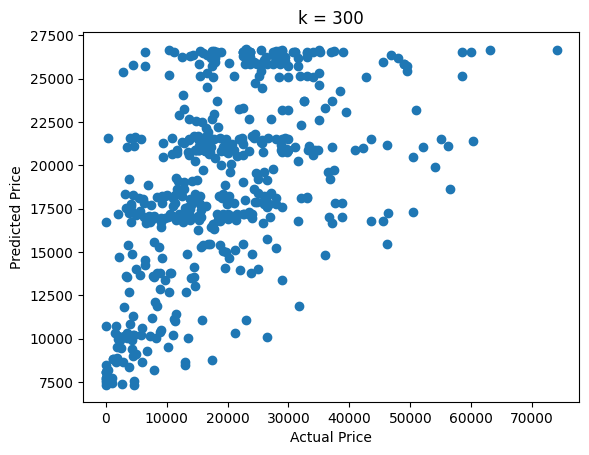

In [9]:
#4
k_values = [3, 10, 25, 50, 100, 300]
mse_results = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)

    print(f"k = {k}, MSE = {mse}")

    # Scatter plot
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}")
    plt.show()

As the k increaes, the varibles get more spread out, this is espcially evient in the 300 one.

In [10]:
#5
best_k = k_values[np.argmin(mse_results)]
print("Best k:", best_k)

Best k: 50


#6
I used chat to clean up my wording. But basically low k had overfitting, high k caused too much underfitting. thats why a middle of 50 was perfect.

chat pretty version:
As k increased, the predicted values became more spread out relative to the actual prices. For small k, the model closely follows local patterns in the data, which can lead to overfitting. However, as k becomes larger, the model averages over more neighbors and produces smoother predictions. This reduces variance but increases bias, causing the model to underfit the data. The increasing spread in the plots reflects this underfitting, as predictions move closer to the overall mean rather than closely matching actual prices.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [11]:
#same imports as earlier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [13]:
#1
df = pd.read_csv("./data/zoo.csv")

print(df.head())
print(df.shape)

     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1  
(101, 18)


In [14]:
print(df['class'].value_counts())

class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


The class distribution shows how many animals belong to each of the seven groups. Some classes are larger than others, which may affect classification accuracy. The biggest classs is curerrntly class 1, than 2, than 4.

In [15]:
print(df.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

Most features are binary indicators (0 or 1). Variables like milk, feathers, and airborne are likely strong predictors of class membership. (so basically since its 0 or 1, you got like a zero shot predcitor in a sense)

In [16]:
#2
X = df.drop(['class', 'animal'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

In [17]:
#3
k_values = [1, 3, 5, 7, 10, 15]

accuracy_results = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append(acc)

    print(f"k = {k}, Accuracy = {acc}")

k = 1, Accuracy = 0.9607843137254902
k = 3, Accuracy = 0.9607843137254902
k = 5, Accuracy = 0.8431372549019608
k = 7, Accuracy = 0.8235294117647058
k = 10, Accuracy = 0.8235294117647058
k = 15, Accuracy = 0.7450980392156863


In [18]:
best_k = k_values[np.argmax(accuracy_results)]
print("Best k:", best_k)

Best k: 1


In [19]:
#4
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

print("Confusion Matrix:")
print(cm)

print("Accuracy:", accuracy_score(y_test, y_pred_best))

Confusion Matrix:
[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  1  0  4]]
Accuracy: 0.9607843137254902


The confusion matrix shows how often each class is correctly classified versus misclassified. Most errors occur between biologically similar groups, such as animals that share features like eggs or aquatic traits. Overall accuracy was 96% which is honestly pretty good!!!

In [20]:
#5
X_small = df[['milk', 'aquatic', 'airborne']]
y = df['class']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y, test_size=0.5, random_state=42, stratify=y
)

model_small = KNeighborsClassifier(n_neighbors=best_k)
model_small.fit(X_train_s, y_train_s)

y_pred_small = model_small.predict(X_test_s)

cm_small = confusion_matrix(y_test_s, y_pred_small)

print("Confusion Matrix (small model):")
print(cm_small)

print("Accuracy:", accuracy_score(y_test_s, y_pred_small))

Confusion Matrix (small model):
[[19  2  0  0  0  0  0]
 [ 0  7  2  1  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  3  1  0  0  0  0]
 [ 0  0  1  4  0  0  0]]
Accuracy: 0.6666666666666666


In [21]:
probs = model_small.predict_proba(X_test_s)

print(probs[:5])

[[0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


When trained only on those spefic varibles, it kidna flops and accuray goes down to 66% Class 1 was still mostly identifed correctly, and so was class 4, however the other classes with less data do much worse. This is probably because those classes dont share much traits with the big main ones, so when it gets to them it gets majorly confused.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [ ]:
import pandas as pd #same import from earler
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [44]:
df = pd.read_csv("./data/airbnb_hw.csv")

# Keep only needed columns
df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]


# Clean Price properly
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(r'[^0-9.]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


print(df.shape)
print(df.head())

(30478, 3)
   Review Scores Rating  Price  Beds
0                   NaN    145   1.0
1                   NaN     37   1.0
2                   NaN     28   1.0
3                   NaN    199   3.0
4                  96.0    549   3.0


In [45]:
#2
# Save rows where rating is missing
df_missing = df[df['Review Scores Rating'].isnull()]

# Keep complete cases only
#3
df_complete = df.dropna(axis=0, how='any')

print("Missing ratings:", df_missing.shape)
print("Complete cases:", df_complete.shape)

Missing ratings: (8323, 3)
Complete cases: (22111, 3)


In [46]:
#4
X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']


In [47]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [49]:
k_values = [3, 5, 10, 20, 50, 100]

sse_results = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    sse = np.sum((y_test - y_pred) ** 2)
    sse_results.append(sse)

    print(f"k = {k}, SSE = {sse}")

k = 3, SSE = 487159.5555555555
k = 5, SSE = 404900.76
k = 10, SSE = 347010.57999999996
k = 20, SSE = 329289.02749999997
k = 50, SSE = 321613.9804
k = 100, SSE = 315971.4803


In [50]:
best_k = k_values[np.argmin(sse_results)]
print("Best k:", best_k) #i choose k by finding the be best one one

Best k: 100


In [51]:
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_scaled, y)

KNeighborsRegressor(n_neighbors=100)

In [53]:
#5
# Only keep rows where Rating is missing BUT Price and Beds exist
df_missing_clean = df_missing.dropna(subset=['Price', 'Beds'])

X_missing = df_missing_clean[['Price', 'Beds']]
X_missing_scaled = scaler.transform(X_missing)

predicted_missing = final_model.predict(X_missing_scaled)

df_missing_clean['Predicted Rating'] = predicted_missing

print(df_missing_clean.head())

    Review Scores Rating  Price  Beds  Predicted Rating
0                    NaN    145   1.0             94.16
1                    NaN     37   1.0             88.33
2                    NaN     28   1.0             86.73
3                    NaN    199   3.0             88.24
13                   NaN     68   1.0             90.53


/tmp/ipython-input-231764686.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_clean['Predicted Rating'] = predicted_missing


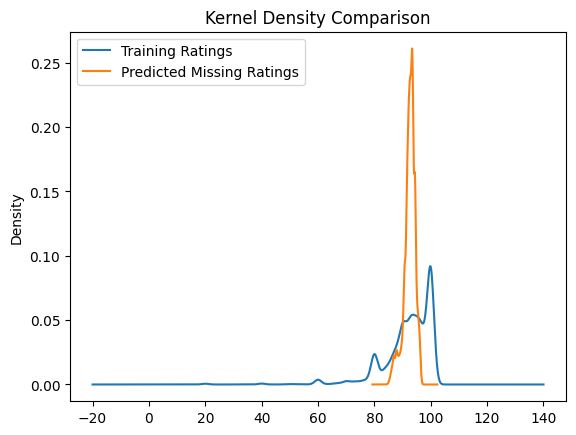

In [54]:
plt.figure()
y.plot(kind='kde', label='Training Ratings')
pd.Series(predicted_missing).plot(kind='kde', label='Predicted Missing Ratings')

plt.legend()
plt.title("Kernel Density Comparison")
plt.show()

#6
From what i can see the KNN values are highly arond the mean. ALthough the predicted ones have a muchhhh higher density than the training one.


Pretty chat version:
The kernel density plot shows that the predicted missing ratings are much more concentrated around the mean compared to the training ratings. The imputed values form a sharp peak around the central rating range, while the original ratings display greater variability and a wider spread. This occurs because k-NN regression averages neighboring observations, which shrinks predictions toward the mean and reduces extreme values. As a result, the imputed ratings appear smoother and less variable than the original data.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)